# Model Analysis

Using this notebook to plot graphs and check out the performances of the different models we have tried

In [27]:
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from shared_funcs import read_csv
from sklearn.metrics import roc_curve, auc

## Latest Model

Plot accuracy and loss over epochs

In [41]:
results = pd.read_csv('E:/JoejynDocuments/CNN_Animal_ID/Nosyarlin/SBWR_BTNR_CCNR/Results/Inception_FYP/AllLayer_propTrain=0.3/run_1/train_val_results.csv', sep = ",")

train_acc = results.TrainAcc
train_loss = results.TrainLoss
val_acc = results.ValAcc
val_loss = results.ValLoss

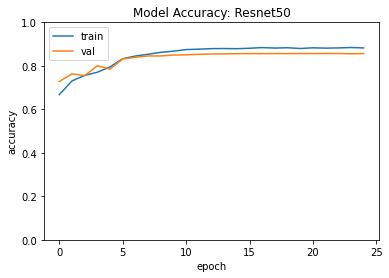

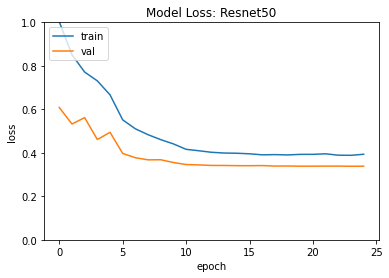

In [42]:
def simple_plot(list1, list2, title, y_lab, x_lab):
    plt.plot(list1)
    plt.plot(list2)
    plt.title(title)
    plt.ylabel(y_lab)
    plt.xlabel(x_lab)
    plt.legend(['train', 'val'], loc='upper left')
    plt.ylim(0, 1)
    plt.show()

simple_plot(train_acc, val_acc, 'Model Accuracy: Resnet50', 'accuracy', 'epoch')
simple_plot(train_loss, val_loss, 'Model Loss: Resnet50', 'loss', 'epoch')

Plot ROC curve on test results

In [37]:
probabilities_file = 'E:/JoejynDocuments/CNN_Animal_ID/Nosyarlin/SBWR_BTNR_CCNR/Results/MobileNet_FYP/AllLayer_propTrain=0.3/run_1/test_probabilities.csv'
y_test_file = './y_test.csv'
y_test = [int(i) == 2 for i in read_csv(y_test_file)]

probabilities = []
with open(probabilities_file) as f:
    reader = csv.reader(f)
    for line in reader:
        probabilities.append(line)
probabilities = np.array(probabilities).astype(float)

In [38]:
fpr, tpr, _ = roc_curve(y_test, probabilities[:, 2])
roc_auc = auc(fpr, tpr)

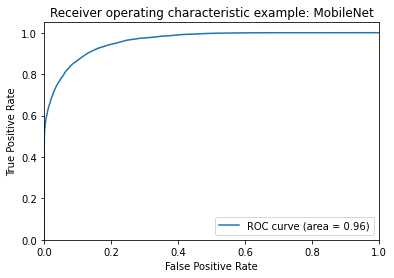

In [40]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example: MobileNet')
plt.legend(loc="lower right")
plt.show()